In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset=pd.read_csv('laptop_price - dataset.csv')

In [3]:
dataset.isnull().sum()

Company                0
Product                0
TypeName               0
Inches                 0
ScreenResolution       0
CPU_Company            0
CPU_Type               0
CPU_Frequency (GHz)    0
RAM (GB)               0
Memory                 0
GPU_Company            0
GPU_Type               0
OpSys                  0
Weight (kg)            0
Price (Euro)           0
dtype: int64

In [4]:
def quanQual(dataset):
    quan=[]
    qual=[]
    for columnName in dataset.columns:
        #print(columnName)
        if(dataset[columnName].dtypes=='O'):
            #print("qual")
            qual.append(columnName)
        else:
            #print("quan")
            quan.append(columnName)
    return quan, qual

In [5]:
quan, qual=quanQual(dataset)

##  covarriance and corelation

In [6]:
dataset[quan].cov()

,Inches,CPU_Frequency (GHz),RAM (GB),Weight (kg),Price (Euro)
Inches,2.043384,0.219698,1.756773,0.790758,66.721479
CPU_Frequency (GHz),0.219698,0.253860,0.940726,0.107439,151.413584
RAM (GB),1.756773,0.940726,25.987660,1.328311,2644.527542
Weight (kg),0.790758,0.107439,1.328311,0.447823,99.360783
Price (Euro),66.721479,151.413584,2644.527542,99.360783,491054.072107


In [7]:
dataset[quan].corr()

,Inches,CPU_Frequency (GHz),RAM (GB),Weight (kg),Price (Euro)
Inches,1.000000,0.305037,0.241078,0.826638,0.066608
CPU_Frequency (GHz),0.305037,1.000000,0.366254,0.318649,0.428847
RAM (GB),0.241078,0.366254,1.000000,0.389370,0.740287
Weight (kg),0.826638,0.318649,0.389370,1.000000,0.211883
Price (Euro),0.066608,0.428847,0.740287,0.211883,1.000000


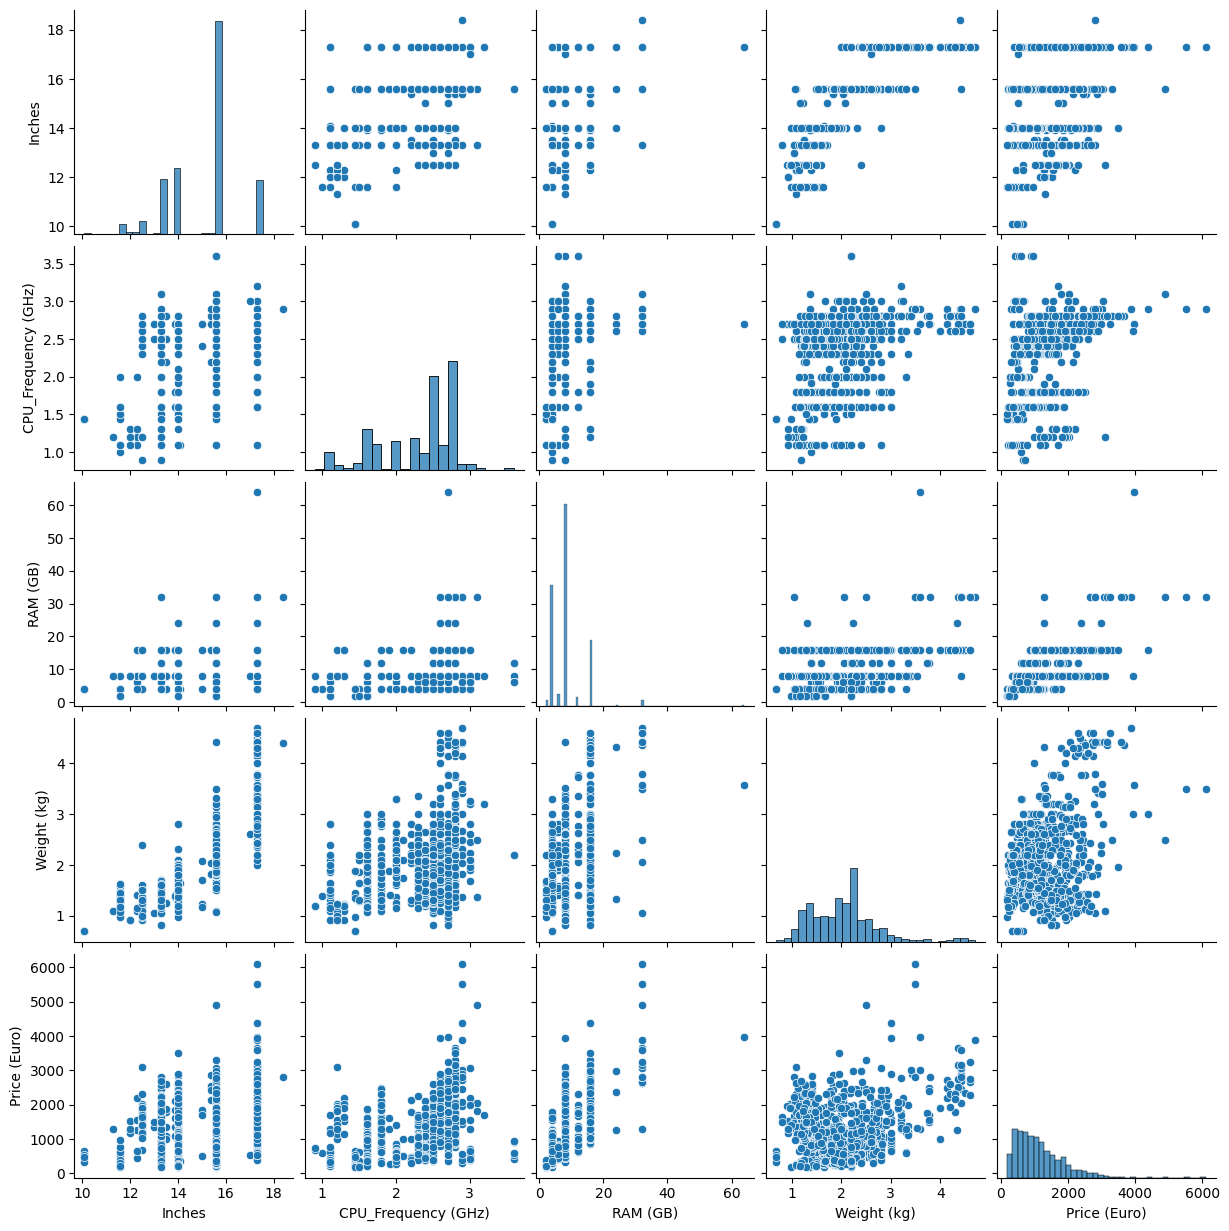

In [8]:
sns.pairplot(dataset)

## VIF

In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def cal_vif(X):
    vif=pd.DataFrame()
    vif["Variable"]=X.columns
    vif["VIF"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

In [10]:
cal_vif(dataset[quan])

,Variable,VIF
0,Inches,41.478362
1,CPU_Frequency (GHz),29.450871
2,RAM (GB),9.472435
3,Weight (kg),19.375237
4,Price (Euro),8.929892


In [11]:
quan = [column for column in quan if column not in ['CPU_Frequency (GHz)']]

In [12]:
cal_vif(dataset[quan])

,Variable,VIF
0,Inches,18.410766
1,RAM (GB),9.471559
2,Weight (kg),19.288508
3,Price (Euro),8.000908


In [13]:
quan = [column for column in quan if column not in ['CPU_Frequency (GHz)', 'Weight (kg)']]

In [14]:
cal_vif(dataset[quan])

,Variable,VIF
0,Inches,4.220406
1,RAM (GB),8.579754
2,Price (Euro),7.858186


In [15]:
quan = [column for column in quan if column not in ['CPU_Frequency (GHz)', 'Weight (kg)', 'RAM (GB)']]

In [16]:
cal_vif(dataset[quan])

,Variable,VIF
0,Inches,3.613912
1,Price (Euro),3.613912


## T TEST

##  Independent sample- Unpaired T-Test

different group same condition

In [17]:
from scipy.stats import ttest_ind
dataset=dataset.dropna()
Pro=dataset[dataset['Product']=='MacBook Pro']['Price (Euro)']
Air=dataset[dataset['Product']=='Macbook Air']['Price (Euro)']
ttest_ind(Pro, Air)

TtestResult(statistic=np.float64(2.6184656062172174), pvalue=np.float64(0.025665213130591308), df=np.float64(10.0))

In [18]:
from scipy.stats import ttest_ind
dataset=dataset.dropna()
Intel=dataset[dataset['GPU_Company']=='Intel']['Price (Euro)']
AMD=dataset[dataset['GPU_Company']=='AMD']['Price (Euro)']
ttest_ind(Intel, AMD)

TtestResult(statistic=np.float64(5.08193095965431), pvalue=np.float64(4.567933617820322e-07), df=np.float64(876.0))

# Dependent sample- Paired T-Test

SAME GROUP DIFFERENT CONDITION

In [19]:
from scipy.stats import ttest_rel
dataset=dataset.dropna()
MacBook_Pro=dataset[dataset['Product']=='MacBook Pro']['RAM (GB)']
MacBook_Pro1=dataset[dataset['Product']=='MacBook Pro']['Weight (kg)']
ttest_rel(MacBook_Pro, MacBook_Pro1)

TtestResult(statistic=np.float64(7.8709320720514455), pvalue=np.float64(2.5200470467860293e-05), df=np.int64(9))

# Hypothesis Testing

In [20]:
from scipy.stats import ttest_ind
dataset=dataset.dropna()
Pro=dataset[dataset['Product']=='MacBook Pro']['Price (Euro)']
Air=dataset[dataset['Product']=='Macbook Air']['Price (Euro)']
statistics, p_value=ttest_ind(Pro, Air)
print("Statistics=", statistics)
print("p_value=", p_value)
if p_value<0.05:
    print("Reject the null hypothesis: There is a significant difference between the groups.")
else:
    print("Accept the null hypothesis: There is no significant difference between the groups.")

Statistics= 2.6184656062172174
p_value= 0.025665213130591308
Reject the null hypothesis: There is a significant difference between the groups.


# ANAVO

## Oneway ANAVO

In [21]:
import scipy.stats as stats
stats.f_oneway(dataset['RAM (GB)'], dataset['Inches'], dataset['Weight (kg)'])

F_onewayResult(statistic=np.float64(5659.597363416737), pvalue=np.float64(0.0))

## Twoway ANAVO

In [22]:
dataset = dataset.rename(columns={'Price (Euro)': 'Price_Euro'})

In [24]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('Price_Euro ~ C(CPU_Company) + C(CPU_Type) + C(CPU_Company):C(CPU_Type)', data=dataset).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)
if p_value<0.05:
    print("Reject the null hypothesis: There is a significant difference between the groups.")
else:
    print("Accept the null hypothesis: There is no significant difference between the groups.")

C:\Anaconda3\envs\aiml\lib\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  warnings.warn('covariance of constraints does not have full '


                                  sum_sq      df          F         PR(>F)
C(CPU_Company)              9.385600e+06     2.0  24.680581   7.761610e-07
C(CPU_Type)                 1.410267e+08    92.0   8.061893   1.510821e-19
C(CPU_Company):C(CPU_Type)  9.983627e+08   184.0  28.536051  1.178133e-203
Residual                    2.247471e+08  1182.0        NaN            NaN
Reject the null hypothesis: There is a significant difference between the groups.


C:\Anaconda3\envs\aiml\lib\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 92, but rank is 17
  warnings.warn('covariance of constraints does not have full '
C:\Anaconda3\envs\aiml\lib\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 184, but rank is 69
  warnings.warn('covariance of constraints does not have full '


In [26]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('Price_Euro ~ C(GPU_Company) + C(GPU_Type) + C(GPU_Company):C(GPU_Type)', data=dataset).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)
if p_value<0.05:
    print("Reject the null hypothesis: There is a significant difference between the groups.")
else:
    print("Accept the null hypothesis: There is no significant difference between the groups.")

C:\Anaconda3\envs\aiml\lib\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 1
  warnings.warn('covariance of constraints does not have full '


                                  sum_sq      df           F         PR(>F)
C(GPU_Company)              6.941886e+07     3.0  112.453347   3.782917e-25
C(GPU_Type)                 2.140024e+08   105.0    9.904794   1.690164e-03
C(GPU_Company):C(GPU_Type)  1.504843e+09   315.0   23.216497  2.366198e-172
Residual                    2.405461e+08  1169.0         NaN            NaN
Reject the null hypothesis: There is a significant difference between the groups.


C:\Anaconda3\envs\aiml\lib\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 105, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Anaconda3\envs\aiml\lib\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 315, but rank is 69
  warnings.warn('covariance of constraints does not have full '
